# Regression with Perceptron

In the week 2 assignment, you implemented the gradient descent method to build a linear regression model, predicting sales given a TV marketing budget. In this lab, you will construct a neural network corresponding to the same simple linear regression model. Then you will train the network, implementing the gradient descent method. After that you will increase the complexity of the neural network to build a multiple linear regression model, predicting house prices based on their size and quality.

*Note*: The same models were discussed in Course 1 "Linear Algebra" week 3 assignment, but model training with backward propagation was omitted.

# Table of Contents

- [ 1 - Simple Linear Regression](#1)
  - [ 1.1 - Simple Linear Regression Model](#1.1)
  - [ 1.2 - Neural Network Model with a Single Perceptron and One Input Node](#1.2)
  - [ 1.3 - Dataset](#1.3)
- [ 2 - Implementation of the Neural Network Model for Linear Regression](#2)
  - [ 2.1 - Defining the Neural Network Structure](#2.1)
  - [ 2.2 - Initialize the Model's Parameters](#2.2)
  - [ 2.3 - The Loop](#2.3)
  - [ 2.4 - Integrate parts 2.1, 2.2 and 2.3 in nn_model() and make predictions](#2.4)
- [ 3 - Multiple Linear Regression](#3)
  - [ 3.1 - Multipe Linear Regression Model](#3.1)
  - [ 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes](#3.2)
  - [ 3.3 - Dataset](#3.3)
  - [ 3.4 - Performance of the Neural Network Model for Multiple Linear Regression](#3.4)

## Packages

Let's first import all the required packages.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3) 

<a name='1'></a>
## 1 - Simple Linear Regression

<a name='1.1'></a>
### 1.1 - Simple Linear Regression Model

You can describe a simple linear regression model as

$$\hat{y} = wx + b,\tag{1}$$

where $\hat{y}$ is a prediction of dependent variable $y$ based on independent variable $x$ using a line equation with the slope $w$ and intercept $b$. 

Given a set of training data points $(x_1, y_1)$, ..., $(x_m, y_m)$, you will find the "best" fitting line - such parameters $w$ and $b$ that the differences between original values $y_i$ and predicted values $\hat{y}_i = wx_i + b$ are minimum.

<a name='1.2'></a>
### 1.2 - Neural Network Model with a Single Perceptron and One Input Node

The simplest neural network model that describes the above problem can be realized by using one **perceptron**. The **input** and **output** layers will have one **node** each ($x$ for input and $\hat{y} = z$ for output):

<img src="images/nn_model_linear_regression_simple.png" style="width:400px;">

**Weight** ($w$) and **bias** ($b$) are the parameters that will get updated when you **train** the model. They are initialized to some random values or set to 0 and updated as the training progresses.

For each training example $x^{(i)}$, the prediction $\hat{y}^{(i)}$ can be calculated as:

\begin{align}
z^{(i)} &=  w x^{(i)} + b,\\
\hat{y}^{(i)} &= z^{(i)},
\tag{2}\end{align}

where $i = 1, \dots, m$.

You can organise all training examples as a vector $X$ of size ($1 \times m$) and perform scalar multiplication of $X$ ($1 \times m$) by a scalar $w$, adding $b$, which will be broadcasted to a vector of size ($1 \times m$):

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{3}\end{align}

This set of calculations is called **forward propagation**.

For each training example you can measure the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives. To compare the resulting vector of the predictions $\hat{Y}$ ($1 \times m$) with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.\tag{4}$$

This function is called the sum of squares **cost function**. The aim is to optimize the cost function during the training, which will minimize the differences between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$.

When your weights were just initialized with some random values, and no training was done yet, you can't expect good results. You need to calculate the adjustments for the weight and bias, minimizing the cost function. This process is called **backward propagation**. 

According to the gradient descent algorithm, you can calculate partial derivatives as:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\tag{5}\end{align}

You can see how the additional division by $2$ in the equation $(4)$ helped to simplify the results of the partial derivatives. Then update the parameters iteratively using the expressions

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b },
\tag{6}\end{align}

where $\alpha$ is the learning rate. Then repeat the process until the cost function stops decreasing.

The general **methodology** to build a neural network is to:
1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
2. Initialize the model's parameters
3. Loop:
    - Implement forward propagation (calculate the perceptron output),
    - Implement backward propagation (to get the required corrections for the parameters),
    - Update parameters.
4. Make predictions.

You often build helper functions to compute steps 1-3 and then merge them into one function `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

<a name='1.3'></a>
### 1.3 - Dataset

Load the [Kaggle dataset](https://www.kaggle.com/code/devzohaib/simple-linear-regression/notebook), saved in a file `data/tvmarketing.csv`. It has two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

In [30]:
path = "data/tvmarketing.csv"

adv = pd.read_csv(path)

Print some part of the dataset.

In [31]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


And plot it:

<Axes: xlabel='TV', ylabel='Sales'>

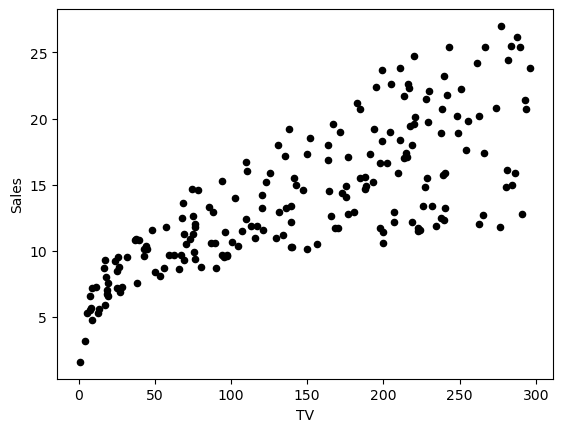

In [32]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')

The fields `TV` and `Sales` have different units. Remember that in the week 2 assignment to make gradient descent algorithm efficient, you needed to normalize each of them: subtract the mean value of the array from each of the elements in the array and divide them by the standard deviation.

Column-wise normalization of the dataset can be done for all of the fields at once and is implemented in the following code:

In [33]:
adv_norm = (adv - np.mean(adv))/np.std(adv)

/Users/lazharlabiod/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Plotting the data, you can see that it looks similar after normalization, but the values on the axes have changed:

<Axes: xlabel='TV', ylabel='Sales'>

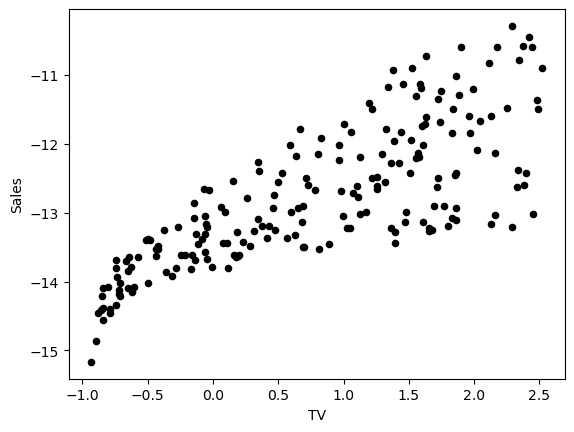

In [34]:
adv_norm.plot(x='TV', y='Sales', kind='scatter', c='black')

Save the fields into variables `X_norm` and `Y_norm` and reshape them to row vectors:

In [35]:
X_norm = adv_norm['TV']
Y_norm = adv_norm['Sales']

X_norm = np.array(X_norm).reshape((1, len(X_norm)))
Y_norm = np.array(Y_norm).reshape((1, len(Y_norm)))

print ('The shape of X_norm: ' + str(X_norm.shape))
print ('The shape of Y_norm: ' + str(Y_norm.shape))
print ('I have m = %d training examples!' % (X_norm.shape[1]))

The shape of X_norm: (1, 200)
The shape of Y_norm: (1, 200)
I have m = 200 training examples!


<a name='2'></a>
## 2 - Implementation of the Neural Network Model for Linear Regression

Setup the neural network in a way which will allow to extend this simple case of a model with a single perceptron and one input node to more complicated structures later.

<a name='2.1'></a>
### 2.1 - Defining the Neural Network Structure

Define two variables:
- `n_x`: the size of the input layer
- `n_y`: the size of the output layer

using shapes of arrays `X` and `Y`.

In [36]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    return (n_x, n_y)

(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


<a name='2.2'></a>
### 2.2 - Initialize the Model's Parameters

Implement the function `initialize_parameters()`, initializing the weights array of shape $(n_y \times n_x) = (1 \times 1)$ with random values and the bias vector of shape $(n_y \times 1) = (1 \times 1)$ with zeros.

In [37]:
def initialize_parameters(n_x, n_y):
    """
    Returns:
    params -- python dictionary containing your parameters:
                    W -- weight matrix of shape (n_y, n_x)
                    b -- bias value set as a vector of shape (n_y, 1)
    """
    
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters = initialize_parameters(n_x, n_y)
print("W = " + str(parameters["W"]))
print("b = " + str(parameters["b"]))

W = [[0.01788628]]
b = [[0.]]


<a name='2.3'></a>
### 2.3 - The Loop

Implement `forward_propagation()` following the equation $(3)$ in the section [1.2](#1.2):
\begin{align}
Z &=  w X + b\\
\hat{Y} &= Z,
\end{align}

In [38]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    Y_hat -- The output
    """
    W = parameters["W"]
    b = parameters["b"]
    
    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b
    Y_hat = Z

    return Y_hat

Y_hat = forward_propagation(X_norm, parameters)

print("Some elements of output vector Y_hat:", Y_hat[0, 0:5])

Some elements of output vector Y_hat: [ 0.03123806 -0.0075256  -0.01322737  0.01482199  0.02094146]


Your weights were just initialized with some random values, so the model has not been trained yet. 

Define a cost function $(4)$ which will be used to train the model:

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [39]:
def compute_cost(Y_hat, Y):
    """
    Computes the cost function as a sum of squares
    
    Arguments:
    Y_hat -- The output of the neural network of shape (n_y, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    
    """
    # Number of examples.
    m = Y_hat.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2)/(2*m)
    
    return cost

print("cost = " + str(compute_cost(Y_hat, Y_norm)))

cost = 82.32261313384137


Calculate partial derivatives as shown in $(5)$:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\end{align}

In [40]:
def backward_propagation(Y_hat, X, Y):
    """
    Implements the backward propagation, calculating gradients
    
    Arguments:
    Y_hat -- the output of the neural network of shape (n_y, number of examples)
    X -- input data of shape (n_x, number of examples)
    Y -- "true" labels vector of shape (n_y, number of examples)
    
    Returns:
    grads -- python dictionary containing gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity. 
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    grads = {"dW": dW,
             "db": db}
    
    return grads

grads = backward_propagation(Y_hat, X_norm, Y_norm)

print("dW = " + str(grads["dW"]))
print("db = " + str(grads["db"]))

dW = [[9.1714438]]
db = [[12.79347054]]


Update parameters as shown in $(6)$:

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.
\end{align}


In [41]:
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing parameters 
    grads -- python dictionary containing gradients 
    learning_rate -- learning rate parameter for gradient descent
    
    Returns:
    parameters -- python dictionary containing updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Retrieve each gradient from the dictionary "grads".
    dW = grads["dW"]
    db = grads["db"]
    
    # Update rule for each parameter.
    W = W - learning_rate * dW
    b = b - learning_rate * db
    
    parameters = {"W": W,
                  "b": b}
    
    return parameters

parameters_updated = update_parameters(parameters, grads)

print("W updated = " + str(parameters_updated["W"]))
print("b updated = " + str(parameters_updated["b"]))

W updated = [[-10.98784627]]
b updated = [[-15.35216465]]


<a name='2.4'></a>
### 2.4 - Integrate parts 2.1, 2.2 and 2.3 in nn_model() and make predictions

Build your neural network model in `nn_model()`.

In [42]:
def nn_model(X, Y, num_iterations=10, learning_rate=1.2, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (n_x, number of examples)
    Y -- labels of shape (n_y, number of examples)
    num_iterations -- number of iterations in the loop
    learning_rate -- learning rate parameter for gradient descent
    print_cost -- if True, print the cost every iteration
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to make predictions.
    """
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[1]
    
    parameters = initialize_parameters(n_x, n_y)
    
    # Loop
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost = compute_cost(Y_hat, Y)
        
        # Backpropagation. Inputs: "Y_hat, X, Y". Outputs: "grads".
        grads = backward_propagation(Y_hat, X, Y)
    
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every iteration.
        if print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [43]:
parameters_simple = nn_model(X_norm, Y_norm, num_iterations=30, learning_rate=1.2, print_cost=True)
print("W = " + str(parameters_simple["W"]))
print("b = " + str(parameters_simple["b"]))

W_simple = parameters["W"]
b_simple = parameters["b"]

Cost after iteration 0: 82.198751
Cost after iteration 1: 130.739329
Cost after iteration 2: 305.245531
Cost after iteration 3: 741.580765
Cost after iteration 4: 1807.749252
Cost after iteration 5: 4408.245575
Cost after iteration 6: 10750.238833
Cost after iteration 7: 26216.684591
Cost after iteration 8: 63935.226298
Cost after iteration 9: 155920.696905
Cost after iteration 10: 380248.742860
Cost after iteration 11: 927325.056636
Cost after iteration 12: 2261498.373272
Cost after iteration 13: 5515191.494311
Cost after iteration 14: 13450081.807199
Cost after iteration 15: 32801164.387932
Cost after iteration 16: 79993297.143454
Cost after iteration 17: 195082330.778823
Cost after iteration 18: 475753809.047061
Cost after iteration 19: 1160236736.958866
Cost after iteration 20: 2829508162.375867
Cost after iteration 21: 6900416256.774296
Cost after iteration 22: 16828276076.754570
Cost after iteration 23: 41039680097.592232
Cost after iteration 24: 100084841420.327301
Cost after it

You can see that after a few iterations the cost function does not change anymore (the model converges).

*Note*: This is a very simple model. In reality the models do not converge that quickly.

The final model parameters can be used for making predictions, but don't forget about normalization and denormalization.

In [44]:
def predict(X, Y, parameters, X_pred):
    
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Use the same mean and standard deviation of the original training array X.
    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean)/X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))
        X_std = np.array(np.std(X)).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean)/X_std)
    # Make predictions.
    Y_pred_norm = np.matmul(W, X_pred_norm) + b
    # Use the same mean and standard deviation of the original training array Y.
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    
    return Y_pred[0]

X_pred = np.array([50, 120, 280])
Y_pred = predict(adv["TV"], adv["Sales"], parameters_simple, X_pred)
print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales:\n{Y_pred}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[-8559389.36111851  7032155.96235436 42669973.84457804]


Let's plot the linear regression line and some predictions. The regression line is red and the predicted points are blue.

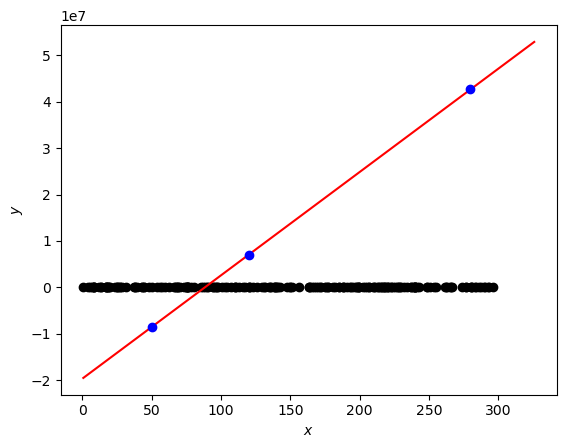

In [45]:
fig, ax = plt.subplots()
plt.scatter(adv["TV"], adv["Sales"], color="black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(adv["TV"]),np.max(adv["TV"])*1.1, 0.1)
Y_line = predict(adv["TV"], adv["Sales"], parameters_simple, X_line)
ax.plot(X_line, Y_line, "r")
ax.plot(X_pred, Y_pred, "bo")
plt.plot()
plt.show()

Now let's increase the number of the input nodes to build a multiple linear regression model.

<a name='3'></a>
## 3 - Multiple Linear Regression

<a name='3.1'></a>
### 3.1 - Multipe Linear Regression Model

You can write a multiple linear regression model with two independent variables $x_1$, $x_2$ as

$$\hat{y} = w_1x_1 + w_2x_2 + b = Wx + b,\tag{7}$$

where $Wx$ is the dot product of the input vector $x = \begin{bmatrix} x_1 & x_2\end{bmatrix}$ and the parameters vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$, scalar parameter $b$ is the intercept. The goal of the training process is to find the "best" parameters $w_1$, $w_2$ and $b$ such that the differences between original values $y_i$ and predicted values $\hat{y}_i$ are minimum for the given training examples.

<a name='3.2'></a>
### 3.2 - Neural Network Model with a Single Perceptron and Two Input Nodes

To describe the multiple regression problem, you can still use a model with one perceptron, but this time you need two input nodes, as shown in the following scheme:

<img src="images/nn_model_linear_regression_multiple.png" style="width:420px;">

The perceptron output calculation for every training example $x^{(i)} = \begin{bmatrix} x_1^{(i)} & x_2^{(i)}\end{bmatrix}$ can be written with dot product:

$$z^{(i)} = w_1x_1^{(i)} + w_2x_2^{(i)} + b = Wx^{(i)} + b,\tag{8}$$

where weights are in the vector $W = \begin{bmatrix} w_1 & w_2\end{bmatrix}$ and bias $b$ is a scalar. The output layer will have the same single node $\hat{y} = z$.

Organise all training examples in a matrix $X$ of a shape ($2 \times m$), putting $x_1^{(i)}$ and $x_2^{(i)}$ into columns. Then matrix multiplication of $W$ ($1 \times 2$) and $X$ ($2 \times m$) will give a ($1 \times m$) vector

$$WX = 
\begin{bmatrix} w_1 & w_2\end{bmatrix} 
\begin{bmatrix} 
x_1^{(1)} & x_1^{(2)} & \dots & x_1^{(m)} \\ 
x_2^{(1)} & x_2^{(2)} & \dots & x_2^{(m)} \\ \end{bmatrix}
=\begin{bmatrix} 
w_1x_1^{(1)} + w_2x_2^{(1)} & 
w_1x_1^{(2)} + w_2x_2^{(2)} & \dots & 
w_1x_1^{(m)} + w_2x_2^{(m)}\end{bmatrix}.$$

And the model can be written as

\begin{align}
Z &=  W X + b,\\
\hat{Y} &= Z,
\tag{9}\end{align}

where $b$ is broadcasted to the vector of size ($1 \times m$). These are the calculations to perform in the forward propagation step. Cost function will remain the same (see equation $(4)$ in the section [1.2](#1.2)):

$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

To implement the gradient descent algorithm, you can calculate cost function partial derivatives as:

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w_1 } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x_1^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial w_2 } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x_2^{(i)},\tag{10}\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\end{align}

After performing the forward propagation as shown in $(9)$, the variable $\hat{Y}$ will contain the predictions in the array of size ($1 \times m$). The original values $y^{(i)}$ will be kept in the array $Y$ of the same size. Thus, $\left(\hat{Y} - Y\right)$ will be a ($1 \times m$) array containing differences $\left(\hat{y}^{(i)} - y^{(i)}\right)$. Matrix $X$ of size ($2 \times m$) has all $x_1^{(i)}$ values in the first row and $x_2^{(i)}$ in the second row. Thus, the sums in the first two equations of $(10)$ can be calculated as matrix multiplication of $\left(\hat{Y} - Y\right)$ of a shape ($1 \times m$) and $X^T$ of a shape ($m \times 2$), resulting in the ($1 \times 2$) array:

$$\frac{\partial \mathcal{L} }{ \partial W } = 
\begin{bmatrix} \frac{\partial \mathcal{L} }{ \partial w_1 } & 
\frac{\partial \mathcal{L} }{ \partial w_2 }\end{bmatrix} = \frac{1}{m}\left(\hat{Y} - Y\right)X^T.\tag{11}$$

Similarly for $\frac{\partial \mathcal{L} }{ \partial b }$:

$$\frac{\partial \mathcal{L} }{ \partial b } = \frac{1}{m}\left(\hat{Y} - Y\right)\mathbf{1}.\tag{12}$$

where $\mathbf{1}$ is just a ($m \times 1$) vector of ones.


See how linear algebra and calculus work together to make calculations so nice and tidy! You can now update the parameters using matrix form of $W$:

\begin{align}
W &= W - \alpha \frac{\partial \mathcal{L} }{ \partial W },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b },
\tag{13}\end{align}

where $\alpha$ is a learning rate. Repeat the process in a loop until the cost function stops decreasing.

<a name='3.3'></a>
### 3.3 - Dataset

Let's build a linear regression model for a Kaggle dataset [House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), saved in a file `data/house_prices_train.csv`. You will use two fields - ground living area (`GrLivArea`, square feet) and rates of the overall quality of material and finish (`OverallQual`, 1-10) to predict sales price (`SalePrice`, dollars).

To open the dataset you can use `pandas` function `read_csv`:

In [62]:
df = pd.read_csv('data/house_prices_train.csv')

Select the required fields and save them in the variables `X_multi`, `Y_multi`:

In [63]:
X_multi = df[['GrLivArea', 'OverallQual']]
Y_multi = df['SalePrice']

Preview the data:

In [64]:
display(X_multi)
display(Y_multi)

,GrLivArea,OverallQual
0,1710,7
1,1262,6
2,1786,7
3,1717,7
4,2198,8
...,...,...
1455,1647,6
1456,2073,6
1457,2340,7
1458,1078,5


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Normalize the data:

In [65]:
X_multi_norm = (X_multi - np.mean(X_multi))/np.std(X_multi)
Y_multi_norm = (Y_multi - np.mean(Y_multi))/np.std(Y_multi)

/Users/lazharlabiod/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Convert results to the `NumPy` arrays, transpose `X_multi_norm` to get an array of a shape ($2 \times m$) and reshape `Y_multi_norm` to bring it to the shape ($1 \times m$):

In [66]:
X_multi_norm = np.array(X_multi_norm).T
Y_multi_norm = np.array(Y_multi_norm).reshape((1, len(Y_multi_norm)))

print ('The shape of X: ' + str(X_multi_norm.shape))
print ('The shape of Y: ' + str(Y_multi_norm.shape))
print ('I have m = %d training examples!' % (X_multi_norm.shape[1]))

The shape of X: (2, 1460)
The shape of Y: (1, 1460)
I have m = 1460 training examples!


### 3.4 - Performance of the Neural Network Model for Multiple Linear Regression

Now... you do not need to change anything in your neural network implementation! Go through the code in section [2](#2) and see that if you pass new datasets `X_multi_norm` and `Y_multi_norm`, the input layer size $n_x$ will get equal to $2$ and the rest of the implementation will remain exactly the same, even the backward propagation!

Train the model for $100$ iterations:

In [67]:
parameters_multi = nn_model(X_multi_norm, Y_multi_norm, num_iterations=100, print_cost=True)

print("W = " + str(parameters_multi["W"]))
print("b = " + str(parameters_multi["b"]))

W_multi = parameters_multi["W"]
b_multi = parameters_multi["b"]

Cost after iteration 0: 3.895485
Cost after iteration 1: 434110206849.816589
Cost after iteration 2: 55505887436806194987008.000000
Cost after iteration 3: 7097053908283459064255092052983808.000000
Cost after iteration 4: 907438408843135849103375543720190595502702592.000000
Cost after iteration 5: 116026237997525140889045977723224250210807997169032757248.000000
Cost after iteration 6: 14835263498511922995305328503609048051505508395099743100998896320512.000000
Cost after iteration 7: 1896855804934183097287107914688870498120560940911599032318521587139265381269504.000000
Cost after iteration 8: 242534414375141522444473818726174995540185769950158422962622876355552644361195459138551808.000000
Cost after iteration 9: 31010761072760584329317025886940624665185754366940759964036476270358400769518180961178703416206032896.000000
Cost after iteration 10: 3965075656539107223279289641599931326614167942134498728793415022671071278619956867283901512636861500225562345472.000000
Cost after iteration 11: 

/var/folders/6s/w4bygbm93kn3h_70tc1wx57m0000gn/T/ipykernel_47485/651274294.py:17: RuntimeWarning: overflow encountered in square
  cost = np.sum((Y_hat - Y)**2)/(2*m)
/Users/lazharlabiod/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/var/folders/6s/w4bygbm93kn3h_70tc1wx57m0000gn/T/ipykernel_47485/583824931.py:14: RuntimeWarning: invalid value encountered in matmul
  Z = np.matmul(W, X) + b


Now you are ready to make predictions:

In [69]:
X_pred_multi = np.array([[1710, 7], [1200, 6], [2200, 8]]).T
Y_pred_multi = predict(X_multi, Y_multi, parameters_multi, X_pred_multi)

print(f"Ground living area, square feet:\n{X_pred_multi[0]}")
print(f"Rates of the overall quality of material and finish, 1-10:\n{X_pred_multi[1]}")
print(f"Predictions of sales price, $:\n{np.round(Y_pred_multi)}")

ValueError: cannot reshape array of size 1 into shape (2,1)

Congrats on finishing this lab!